## research
    > yg berbayar reviews&ratingnya gmn? (Price - Reviews&Rating)
    > yg sizenya gede apakah menggunakan versi android terbaru? (size - android verison. hue='cat')
    > banyak yg install reviews nya gimana? (installer - reviews. hue='cat')
    > melihat tingkat/rating menariknya suatu categori di kalangan org2 tertentu  (rating - category. 
      hue=contentRating ygbukan everyone')
    > content rating (tnp everyone) dengan kategori aplikasi
      untuk melihat, ana muda, orangtua.maturnity usia sekian & sekian menyukai aplikasi dg kategori apa?
      BUKAN. aplikasi dg category ini itu disukai siapa aja?kalo gitu banyak yg 'everyone' yg kita lihat 
      aplikasi ini cenderung disukai oleh..............

## Korelasi
    > installer & revies. semakin banyak yg install reviesnya akan semakin ?
    > lihat korelasi secara keseluruhan. baru melakukan regres/ pun clasification
    
## HATI HATI DALAM MENGOLAH DATA BERIKUT -- Jangan diikut sertakan
    Dataset.RATING = banyak yg 0.0
    ANDROID VER & KATEGORI/Genres= unknown
    dataset.REVIEWS.values=='0'

In [446]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [447]:
dataset=pd.read_csv('googleplaystore.csv')

In [448]:
dataset[dataset.isnull().any(axis=1)].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up


In [449]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [450]:
dataset.Rating = dataset.Rating.fillna(0.0)
dataset.Installs = dataset.Installs.fillna('0+')

In [451]:
dataset.Installs = dataset.Installs.astype('category')
dataset.Installs.cat.categories
dataset.Category = dataset.Category.astype('category')

In [452]:
dataset[dataset.Installs == 'Free']
#Lah datanya ga bener

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [453]:
dataset.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

### drop & reappend data.iloc [10472]

In [454]:
#drop row value
dataset = dataset.drop([10472])

In [455]:
dataset = dataset.append({'App':'Life Made WI-Fi Touchscreen Photo Frame', 'Category':'Unknown',
                         'Rating':1.9, 'Reviews':19, 'Size':'3.0M', 'Installs':'1,000+', 'Type':'Free',
                         'Price':'0','Content Rating':'Everyone','Genres':'Unknown','Last Updated':'February 11, 2018',
                         'Current Ver':'1.0.19','Android Ver':'4.0 and up'},ignore_index=True)

In [456]:
dataset.iloc[-1]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                          Unknown
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                            Unknown
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10840, dtype: object

In [457]:
dataset = dataset.drop(['Current Ver'], axis=1)

In [458]:
dataset['Android Ver'] = dataset['Android Ver'].fillna('Unknown')

In [459]:
dataset.Type = dataset.Type.fillna('Free')

In [460]:
dataset[dataset.values=='Unknown']
dataset[dataset.Reviews.values=='0']
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",4.0.3 and up


### convert dataset.Size, string -> float
yg awalnya 'Varies with device' -> 99.99
yg awalnya 'k' -> 000

In [461]:
list1 = dataset.Size.values
listNew = [s.replace('M', '') for s in list1]
dataset.Size = listNew

In [462]:
#ubah semua valuenya ke float
#listNew2 = [float(s) for s in list2]
#could not convert string to float: 'Varies with device'
#dataset.Size = listNew2

In [463]:
len(dataset[dataset.Size =='Varies with device'])

1695

In [464]:
#1695 data dg ket Size = 'Varies with device' mau diapain?
#change to 999
list1 = dataset.Size.values
listNew2 = [s.replace('Varies with device', '99.99') for s in list1]
dataset.Size = listNew2

#Convert ke float
# list1 = dataset.Size.values #meskipun copaste, harus di load ulang. karna nilainya udah ganti jd 99.99
# listNew3 = [float(s) for s in list]
#dataset.Size = listNew3

In [465]:
list1 = dataset.Size.values
listNew5 = [s.replace('k', '000') for s in list1]
dataset.Size = listNew5

In [466]:
list1 = dataset.Size.values
listNew6 = [float(s) for s in list1]
dataset.Size = listNew6

In [467]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(2), object(10)
memory usage: 1016.4+ KB


### convert dataset.Price, string -> float

In [468]:
listi = dataset.Price.values
listnewi = [float(s.replace('$','')) for s in listi]
dataset.Price = listnewi
dataset[dataset.Type == 'Paid']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null float64
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(3), object(9)
memory usage: 1016.4+ KB


### 1.yg berbayar reviews&ratingnya gmn? (Price - Rating)
perlu ga sih kita lihat Reviews nya? nooo. why?
karna ini aplikasi yg berbayar. yg mau kita lihat ratingnyaa.
apakah aplikasi yg berbayar itu ratingnya gajauh beda sama yg free?

In [469]:
vis1 = dataset[dataset.Type == 'Paid']

In [474]:
sns.set_style('whitegrid')
vis1 = sns.lmplot(data=vis1, x='Reviews', y='Rating', fit_reg=False, hue='Category')

TypeError: 'FacetGrid' object is not subscriptable

In [475]:
dataset.Price.max()

400.0

### Reviews - Rating
data yg digunakan adalah data yg Reviews&Rating != 0 

In [476]:
listRev = dataset.Reviews
dataset.Reviews = [ int(s) for s in listRev]

In [477]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null float64
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null float64
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Android Ver       10841 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 1016.4+ KB


In [478]:
dataset[(dataset.Reviews == 0) & (dataset.Rating != 0)]
dataset[(dataset.Reviews != 0) & (dataset.Rating == 0)]
vis2 = dataset[(dataset.Reviews !=0) & (dataset.Rating !=0)]
vis2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.00,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.00,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.70,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.00,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.80,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.60,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.00,"50,000+",Free,0.0,Everyone,Art & Design,"April 26, 2018",4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.00,"1,000,000+",Free,0.0,Everyone,Art & Design,"June 14, 2018",4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.00,"1,000,000+",Free,0.0,Everyone,Art & Design,"September 20, 2017",3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.10,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",4.0.3 and up


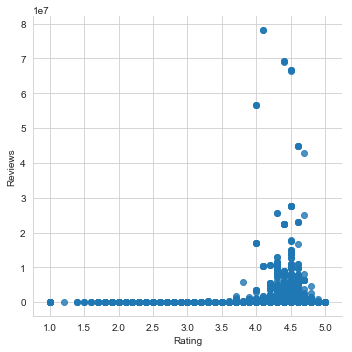

In [479]:
plt.rcParams['figure.figsize'] = 9,9
#sns.set_style('dark', {"axes.facecolor":"black"})
sns.set_style('whitegrid')
#vis2 = sns.kdeplot(vis2.Reviews, vis2.Rating, cmap='Accent', shade=True, shade_lowest =True)
vis2 = sns.lmplot(data=vis2, x='Rating', y='Reviews', fit_reg = False)

TypeError: object of type 'FacetGrid' has no len()

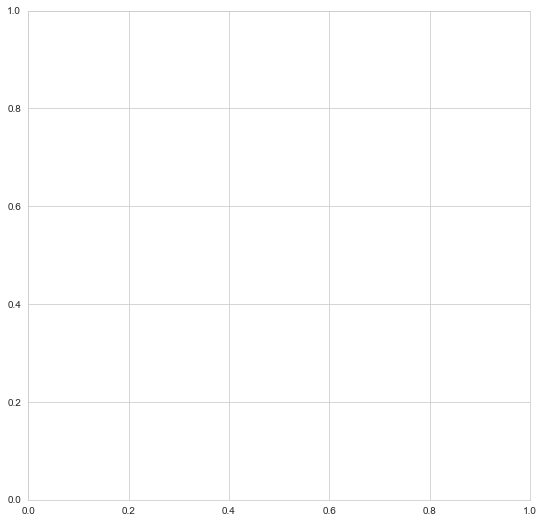

In [481]:
vis2 = sns.kdeplot(data=vis2, x='Reviews', y='Rating', cmap='Accent', shade=True, shade_lowest =True)